In [47]:
D_W = 0.413 # mm^2/s
D_S = 97 # mm^2/s
Ratio = D_S/D_W
Ratio

234.86682808716708

In [48]:
from re import X
from fipy import CellVariable, Grid2D, Viewer, TransientTerm, DiffusionTerm
from fipy.terms import cellTerm
from fipy.tools import numerix
import fipy as fp

nx = 50
ny = 50
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)


phi = CellVariable(name = "solution variable",mesh = mesh,value = 26.)


D = CellVariable(mesh=mesh, value=0.413)


eq =(TransientTerm() == DiffusionTerm(D))

valueTopLeft = 0
valueBottomRight = 0

X, Y = mesh.faceCenters
x,y = mesh.cellCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2))|(mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2))|(mesh.facesBottom & (X > L / 2)))

phi.setValue(750, where=((x-25)**2+(y-25)**2<10**2))
D.setValue(97, where=((x-25)**2+(y-25)**2<10**2))
# D.setValue(97, where=(x>20.)&(x<30.)&(y>20.)&(y<30.))

In [49]:
phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

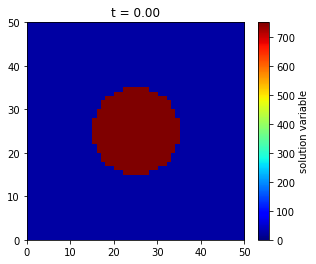

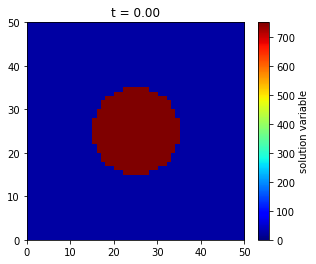

In [50]:

viewer1 = Viewer(vars=phi, datamin=0., datamax=750.,title = 't = 0.00')
viewer1.plot()

In [51]:
t = [0.01,0.05,0.08,0.5,0.9,1.5,5,1000]

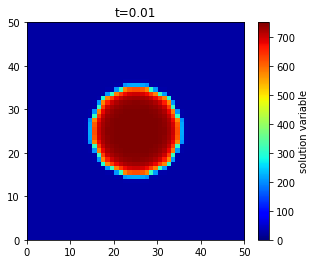

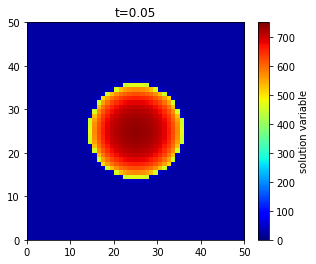

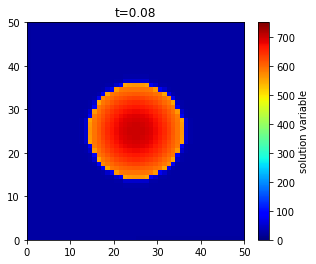

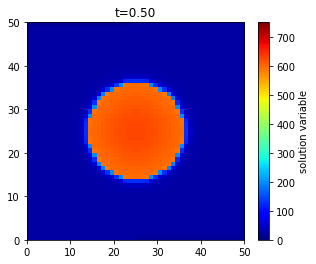

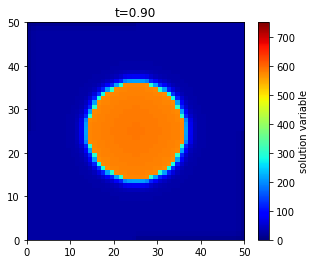

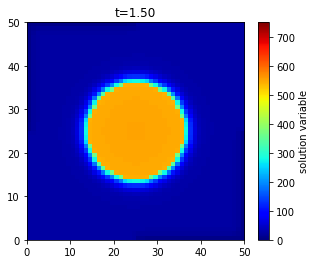

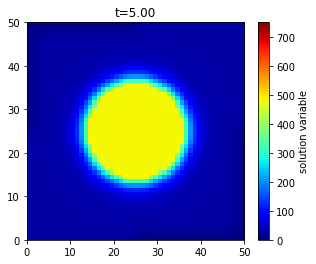

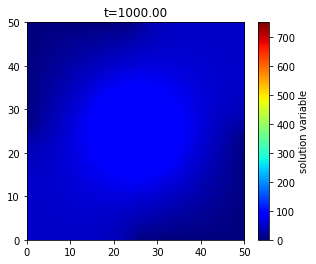

In [52]:
from matplotlib.pyplot import legend


for i in t:
    eq.solve(var=phi,dt=i)
    label = "t=" + "%0.2f" % (i)
    viewer = fp.MatplotlibViewer(vars=phi, datamin=0., datamax=750.,title = label,)


In [55]:
import os,sys
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image_data=[]
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/Initial Stage.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=0.01 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=0.05 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=0.08 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=0.5 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=0.9 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=1.5 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=5 2D.png"))
image_data.append(mpimg.imread("/Users/weiliang/Desktop/IND Math/t=100 2D.png"))
np.size(image_data)




3003264

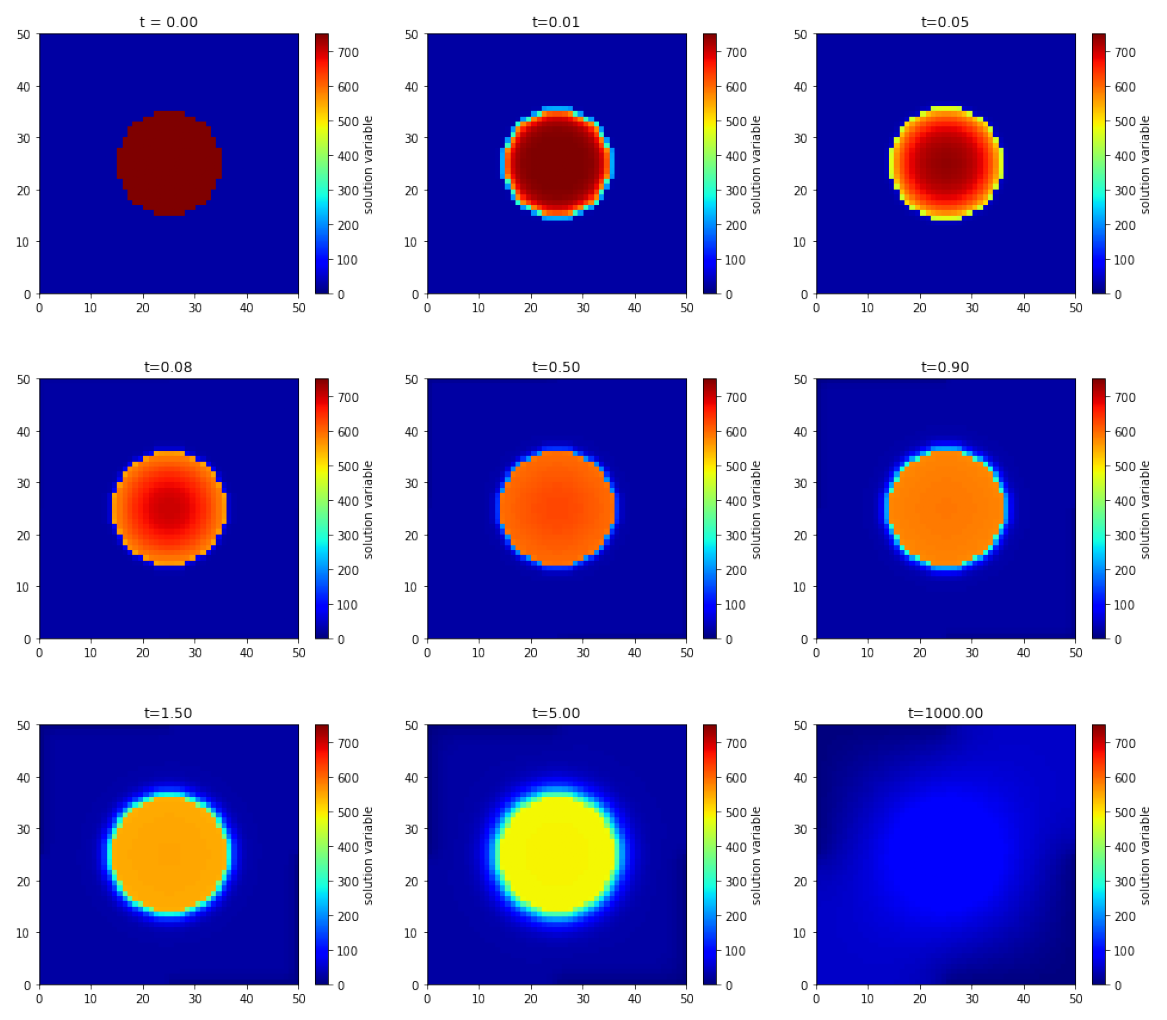

In [56]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
fig, axis  = plt.subplots(3, 3)
fig.set_size_inches(18, 18)

axis[0,0].imshow(image_data[0])
axis[0,0].axis('off')
axis[0,1].imshow(image_data[1])
axis[0,1].axis('off')
axis[0,2].imshow(image_data[2])
axis[0,2].axis('off')
axis[1,0].imshow(image_data[3])
axis[1,0].axis('off')
axis[1,1].imshow(image_data[4])
axis[1,1].axis('off')
axis[1,2].imshow(image_data[5])
axis[1,2].axis('off')
axis[2,0].imshow(image_data[6])
axis[2,0].axis('off')
axis[2,1].imshow(image_data[7])
axis[2,1].axis('off')
axis[2,2].imshow(image_data[8])
axis[2,2].axis('off')
plt.subplots_adjust(left=0.01,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.03,
                    hspace=0)